In [9]:
import pickle
import os
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from parameters import setParams
from main import Replay_Sim

In [10]:
params = setParams()

models_dict = {'EVB': {'n_plan': 20, 'set_gain_to_one': False, 'set_need_to_one': False},
               'prioritized_sweeping': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': True},
               'gain_only': {'n_plan': 20, 'set_gain_to_one': False, 'set_need_to_one': True},
               'need_only': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': False},
               'dyna': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': True},
               'no_replay': {'n_plan': 0, 'set_gain_to_one': True, 'set_need_to_one': True},
               }

maze_dict = {}
maze_dict['mattar'] = {
    'size': (6, 9),
    'walls': [[slice(1, 4), 2], [slice(0, 3), 7], [4, 5]],
    'start_state': np.array([[2, 0]]),
    'goal_state.s_1': np.array([[0, 8]]),
    'goal_state.s_2': np.array([[5, 0]]),
    'reward_magnitude.s': np.array([[1]]),
    'reward_std.s': np.array([[0.1]]),
    'reward_prob.s': np.array([[1]])
}

In [11]:
# extract all of the simulation data
model_data = {}
for maze in maze_dict:
    model_data[maze] = {}
    for model in models_dict:
        model_data[maze][model] = {}
        for k in range(params.N_SIMULATIONS):
            with open('checkpoints/' + model + str(k) + '.pkl', 'rb') as f:
                model_data[maze][model][k] = pickle.load(f)

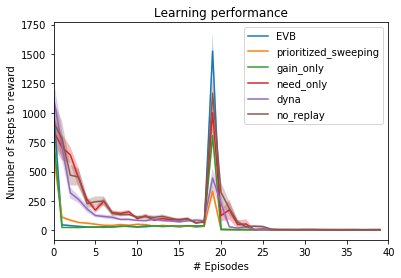

In [12]:
# extract steps per episode and plot figure
fig_1 = plt.figure(1)
x = np.arange(params.MAX_N_EPISODES)
plt.ylabel('Number of steps to reward')
plt.xlabel('# Episodes')
plt.title('Learning performance')
plt.xticks(np.arange(0, params.MAX_N_EPISODES + 1, 5))
plt.xlim(0, params.MAX_N_EPISODES)

steps_per_episode = {}
for maze in maze_dict:
    steps_per_episode[maze] = {}
    for model in models_dict:
        steps_per_episode[maze][model] = np.empty((params.N_SIMULATIONS, params.MAX_N_EPISODES))
        for k in range(params.N_SIMULATIONS):
            steps_per_episode[maze][model][k] = model_data[maze][model][k].steps_per_episode
        # plot figure for model across all simulations
        spe_means = np.nanmean(steps_per_episode[maze][model], axis=0)
        spe_stds = np.std(steps_per_episode[maze][model], axis=0) / np.sqrt(params.N_SIMULATIONS)
        plt.plot(spe_means)
        plt.fill_between(x, spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)

plt.legend(models_dict.keys())